In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')
path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum7"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv(path +'/data/college.csv',sep=',')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


Data Preprocessing

In [ ]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [ ]:
df.duplicated().sum()

np.int64(0)

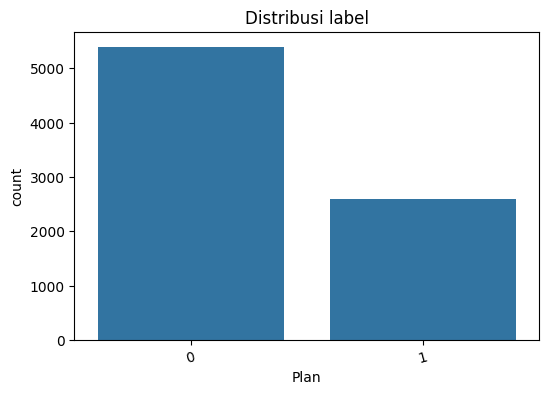

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Plan', data=df)
plt.title('Distribusi label')
plt.xticks (rotation=15)
plt.show()

Encoding data kategori (Mapping label ke kode numerik)


In [ ]:
plan_cat = df['Plan'].astype('category')
plan_classes = list(plan_cat.cat.categories)

df['Plan'] = plan_cat.cat.codes


for col in ['Parent_income', 'IQ', 'Encourage']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,1,1146,58,0,1
1,4561,0,416,27,1,0
2,4563,0,1425,33,1,0
3,4565,1,138,57,0,1
4,4567,0,253,42,1,0


Analisis Korelasi antar Fitur

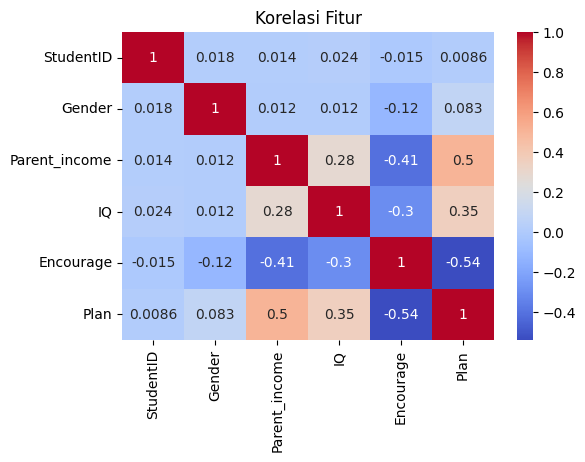

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

Splitting Data (Pembagian data training dan testing)

In [ ]:
feature_cols = ['Parent_income', 'IQ', 'Encourage']
X = df[feature_cols]
y = df['Plan']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=42,
stratify=y
)
len(X_train), len(X_test)

(6400, 1600)

Membangun model

In [ ]:
dt = DecisionTreeClassifier(
criterion='gini',
max_depth=4,
random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Evaluasi model decision tree

In [ ]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) *100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
y_test, y_pred))

Akurasi: 82.62 %

Confusion Matrix:
 [[960 121]
 [157 362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1081
           1       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



Visualisasi hasil model decision tree

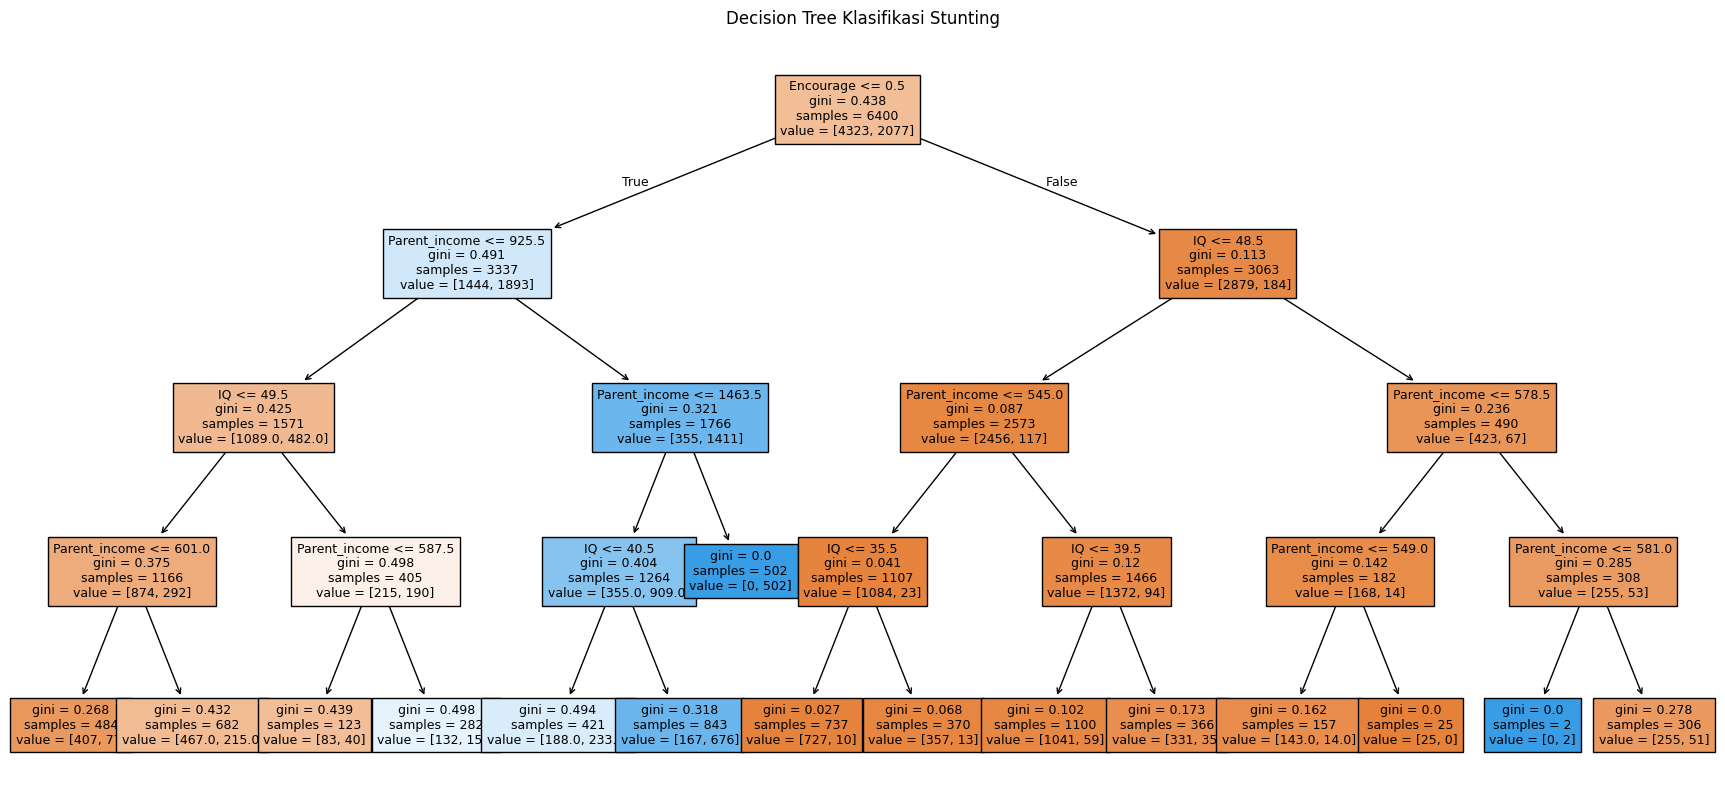

In [ ]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
dt,
feature_names=feature_cols,
filled=True,
fontsize=9
)
plt.title("Decision Tree Klasifikasi Stunting")
plt.show()

Feature importance (Fitur yang paling berpengaruh)

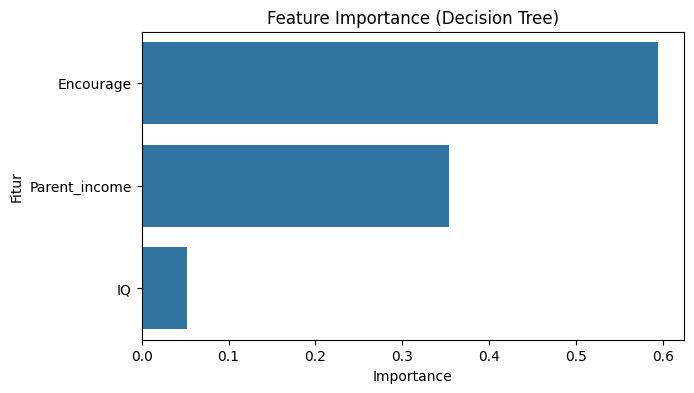

,0
Encourage,0.594873
Parent_income,0.353383
IQ,0.051744


In [ ]:
# Fitur yang penting
imp = pd. Series (dt.feature_importances_, index = feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()
imp

Hyperpaarameter tuning 9Menentukan max_depth terbaik

In [ ]:
scores = {}
for d in range(2, nine := 9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores [d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, " Acc:", round(scores [best_d]*100,2), "%")

Best max_depth: 4  Acc: 82.62 %
